In [23]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [24]:
# Configuração para reprodutibilidade
np.random.seed(42)

# Criar dados sintéticos para análise de churn
n_samples = 1000
X, y = make_classification(
    n_samples=n_samples,
    n_features=8,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    class_sep=0.8,
    random_state=42
)

# Criar DataFrame com nomes de features significativas
feature_names = [
    'tempo_como_cliente', 'valor_mensal', 'chamadas_suporte',
    'minutos_uso', 'dados_consumidos', 'atrasos_pagamento',
    'satisfacao_pesquisa', 'produtos_adicionais'
]

df = pd.DataFrame(X, columns=feature_names)
df['churn'] = y
df['churn_label'] = df['churn'].map({0: 'Não', 1: 'Sim'})

# Ajustar escalas para tornar os dados mais realistas
df['tempo_como_cliente'] = (df['tempo_como_cliente'] * 10 + 50).clip(1, 120)
df['valor_mensal'] = (df['valor_mensal'] * 30 + 80).clip(20, 200)
df['chamadas_suporte'] = (df['chamadas_suporte'] * 2 + 5).clip(0, 20)
df['satisfacao_pesquisa'] = (df['satisfacao_pesquisa'] * 2 + 7).clip(1, 10)

print("📊 Conjunto de dados criado com sucesso!")
print(f"Shape: {df.shape}")
print(f"Taxa de churn: {df['churn'].mean():.2%}")
df.head()

📊 Conjunto de dados criado com sucesso!
Shape: (1000, 10)
Taxa de churn: 50.50%


,tempo_como_cliente,valor_mensal,chamadas_suporte,minutos_uso,dados_consumidos,atrasos_pagamento,satisfacao_pesquisa,produtos_adicionais,churn,churn_label
0,34.674618,200.000000,0.000000,-4.403768,2.435848,1.894175,7.196309,3.393487,0,Não
1,72.729142,128.297378,2.629792,-2.314962,-0.784756,1.401542,4.889457,2.289872,0,Não
2,49.368942,118.047015,1.655172,-0.228009,1.412809,2.897737,4.807158,1.337870,0,Não
3,50.356510,55.709676,5.360993,-0.965000,2.073523,1.717760,6.756138,0.226253,0,Não
4,33.805770,118.310436,3.671119,-0.209297,0.185404,-0.155958,7.341985,-1.702917,1,Sim


In [25]:
# Análise exploratória básica
print("📈 Estatísticas Descritivas:")
print(df.describe())

print("\n🎯 Distribuição de Churn:")
print(df['churn_label'].value_counts())
print(df['churn_label'].value_counts(normalize=True))

📈 Estatísticas Descritivas:
       tempo_como_cliente  valor_mensal  chamadas_suporte  minutos_uso  \
count         1000.000000   1000.000000       1000.000000  1000.000000   
mean            50.054679     98.238866          4.584602     0.432850   
std             16.749022     54.821369          3.194083     1.511958   
min              1.000000     20.000000          0.000000    -5.246468   
25%             38.938601     55.767164          2.211347    -0.552348   
50%             51.597755     92.757327          4.326426     0.428545   
75%             61.960703    138.191427          6.733898     1.430888   
max            101.798059    200.000000         15.532178     5.606373   

       dados_consumidos  atrasos_pagamento  satisfacao_pesquisa  \
count       1000.000000        1000.000000          1000.000000   
mean          -0.076207           0.878599             5.386803   
std            1.725892           2.142203             2.253332   
min           -5.322664          -5.4

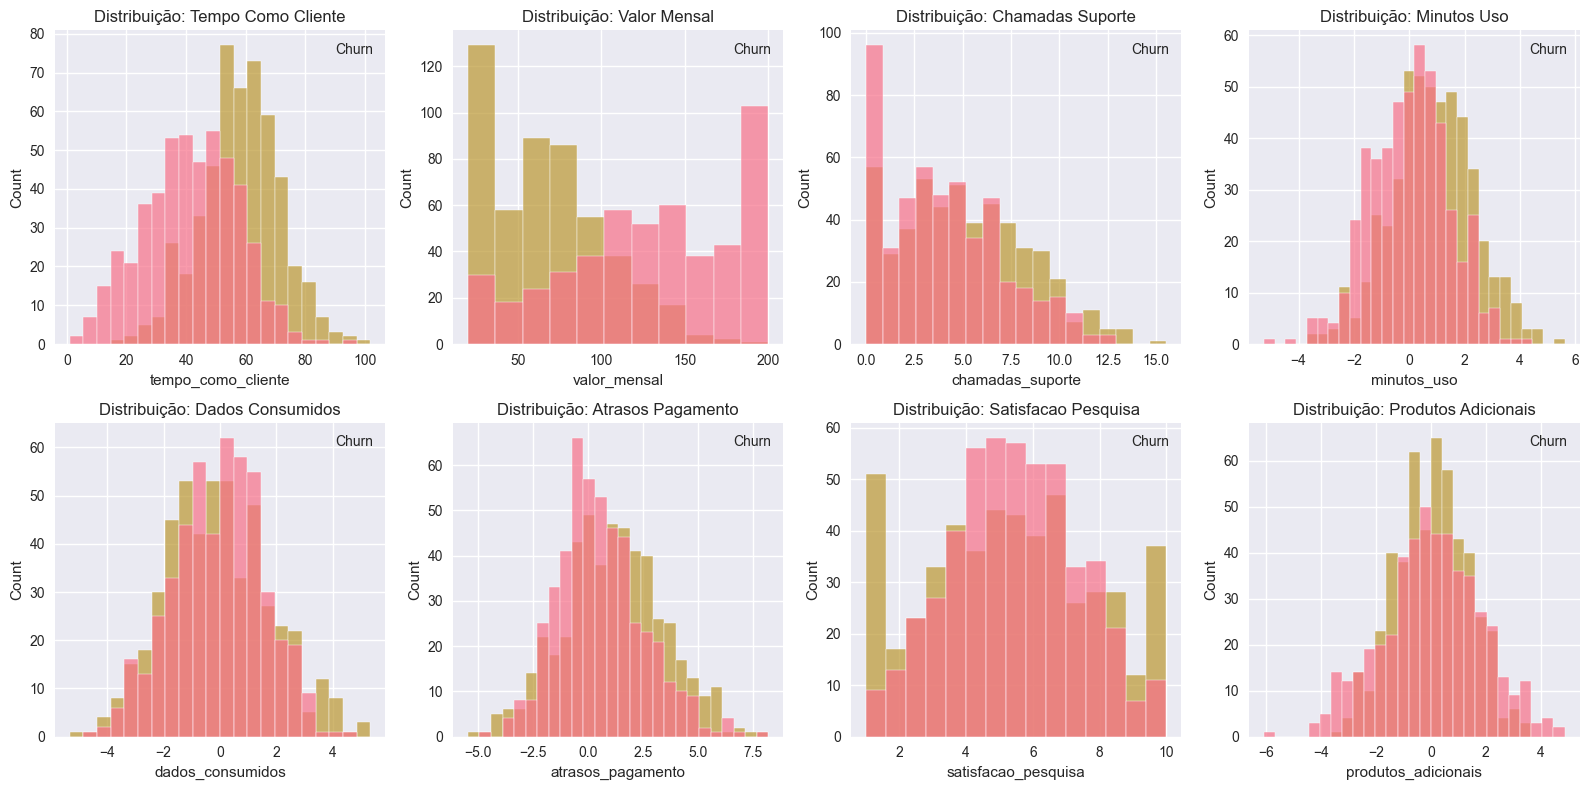

✓ Figura 1 salva: figuras/distribuicao_variaveis.png


In [26]:
### Visualizações para Demonstração
# Criar diretório para salvar figuras
os.makedirs('figuras', exist_ok=True)

# Visualização 1: Distribuição das variáveis principais
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(feature_names):
    sns.histplot(data=df, x=col, hue='churn_label', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribuição: {col.replace("_", " ").title()}')
    axes[i].legend(title='Churn')

plt.tight_layout()
plt.savefig('figuras/distribuicao_variaveis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figura 1 salva: figuras/distribuicao_variaveis.png")

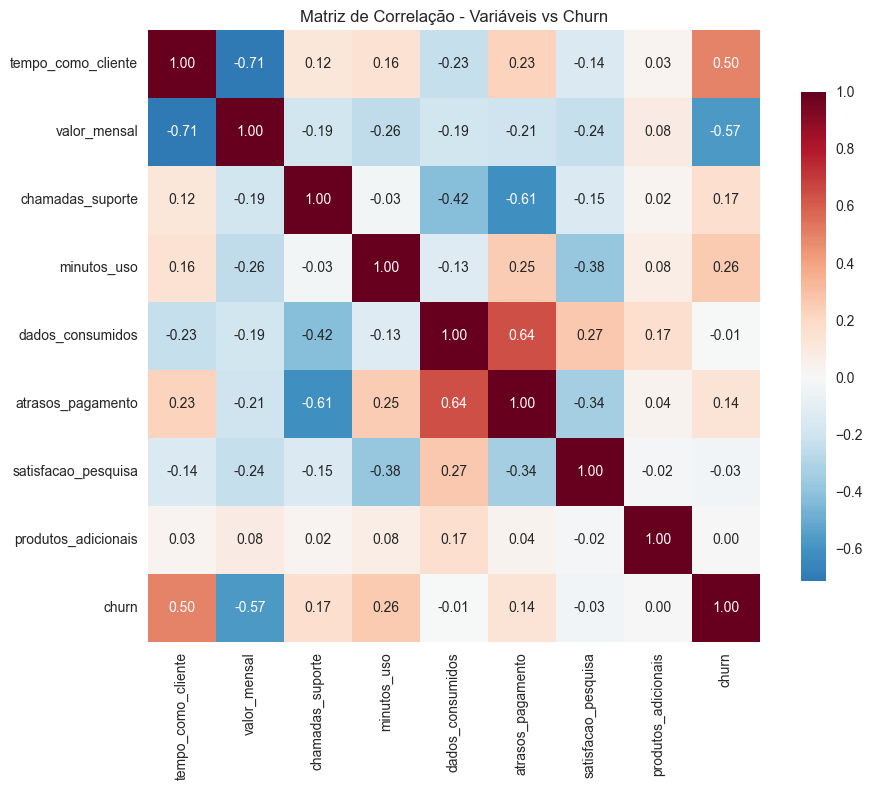

✓ Figura 2 salva: figuras/matriz_correlacao.png


In [27]:
# Visualização 2: Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names + ['churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação - Variáveis vs Churn')
plt.tight_layout()
plt.savefig('figuras/matriz_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figura 2 salva: figuras/matriz_correlacao.png")

In [28]:
# Modelagem básica para demonstração
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names], df['churn'], test_size=0.2, random_state=42
)

# Treinar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Importância das features
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)


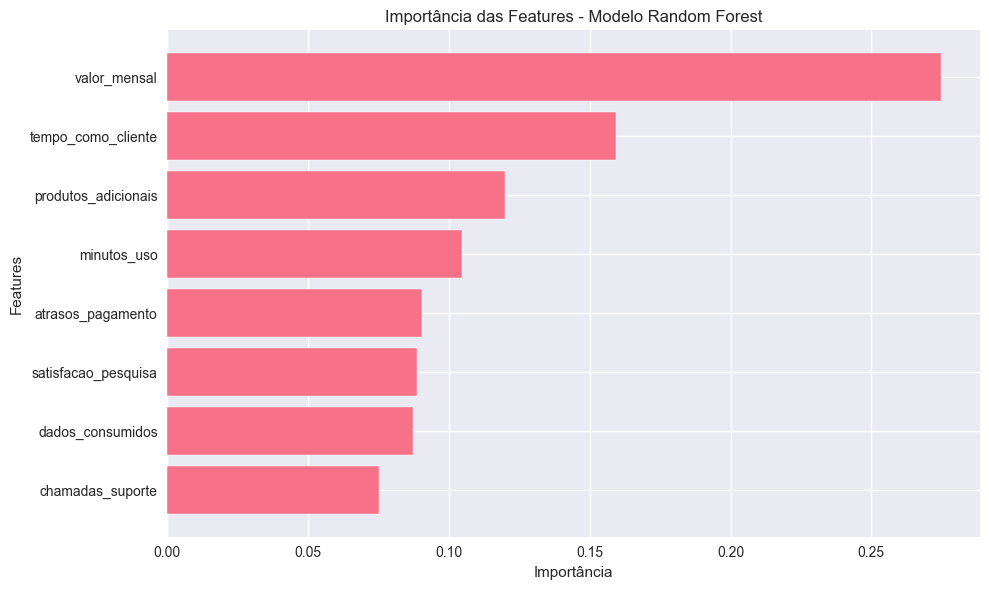

✓ Figura 3 salva: figuras/feature_importance.png


In [29]:
# Visualização 3: Importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Importância das Features - Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('figuras/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figura 3 salva: figuras/feature_importance.png")



🤖 Performance do Modelo:
              precision    recall  f1-score   support

   Não Churn       0.91      0.87      0.89        98
       Churn       0.88      0.92      0.90       102

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



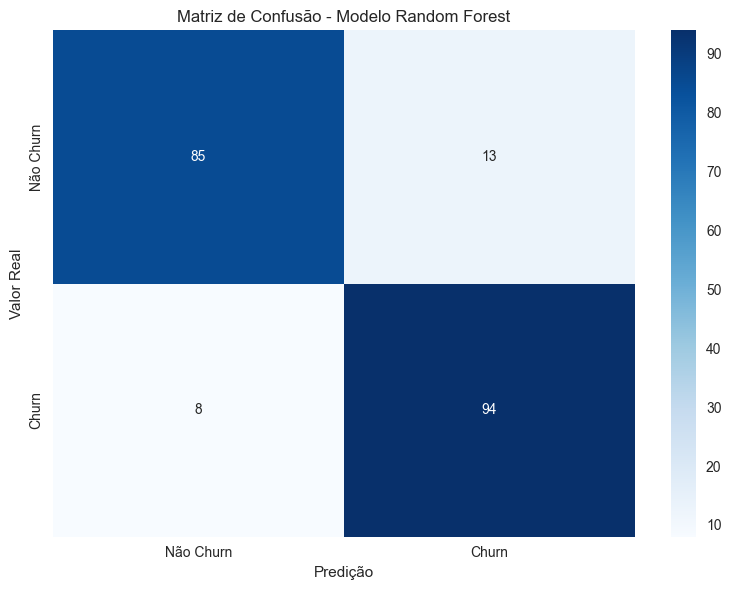

✓ Figura 4 salva: figuras/matriz_confusao.png


In [30]:
# Métricas do modelo
print("\n🤖 Performance do Modelo:")
print(classification_report(y_test, y_pred, target_names=['Não Churn', 'Churn']))
# Visualização 4: Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Modelo Random Forest')
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.tight_layout()
plt.savefig('figuras/matriz_confusao.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figura 4 salva: figuras/matriz_confusao.png")

In [31]:
# Visualização interativa com Plotly (para demonstrar WebPDF)
fig_plotly = px.scatter(
    df,
    x='valor_mensal',
    y='tempo_como_cliente',
    color='churn_label',
    size='chamadas_suporte',
    hover_data=['satisfacao_pesquisa', 'atrasos_pagamento'],
    title='Análise Interativa: Valor Mensal vs Tempo como Cliente',
    labels={
        'valor_mensal': 'Valor Mensal (R$)',
        'tempo_como_cliente': 'Tempo como Cliente (meses)',
        'churn_label': 'Churn'
    }
)

fig_plotly.update_layout(
    width=800,
    height=500,
    font=dict(size=12)
)

fig_plotly.show()
print("✓ Visualização interativa criada (ideal para WebPDF)")

✓ Visualização interativa criada (ideal para WebPDF)
